In [2]:
import numpy as np
import os
#import expectancy

subfolder = "images"
folder_path = os.getcwd()
# Construct the full path
subfolder_path = os.path.join(folder_path, subfolder)

#result = expectancy.expectedValue(pmf)
print(subfolder_path)

D:\stochastics\images


In [41]:
import numpy as np
from PIL import Image
import os
import requantize,plot,features, kurtosis_skewness, moments, entropy

# Loadig a grayscale image

subfolder = "images"
folder_path = os.getcwd()
# Construct the full path
subfolder_path = os.path.join(folder_path, subfolder)

print('Address ',subfolder_path)

#auxiliary variables to select the image
choose = 4
i=1

for fileName in os.listdir(subfolder_path):
    if  (fileName.endswith('.png') or fileName.endswith('.jpg') or fileName.endswith('.bmp')) and (not fileName.startswith('resized')):
        if (i==choose):
            print(f'Selected Image: {fileName}')
            image_path = os.path.join(subfolder_path, fileName)
            image = Image.open(image_path)
            image = image.convert("L")
            break
    i+=1

# Convert image to a NumPy array
image_array = np.array(image)


# Requantize to 4 bits = 16 levels (e.g., 0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240 )
# Requantize to 2 bits = 4 levels (e.g., 0, 64, 128, 192)
# Requantize to 1 bit = 2 levels (e.g. 0, 256)
num_levels = 16
requantized_image = requantize.requantize_image(image_array, num_levels)

# Construct histogram
unique_values, counts = np.unique(requantized_image, return_counts=True)
pmf = counts/(sum(counts))
xpmf = unique_values*pmf

Address  D:\stochastics\images
Selected Image: WP_20160127_088.jpg


In [48]:
unique_values
modeValue = unique_values[np.argmax(pmf)]
cdf = np.cumsum(pmf)
median_index = np.searchsorted(cdf, 0.5)
#median_index = 96*median_index
medianValue = np.median(cdf)
print(modeValue,unique_values[median_index])
#print(f' : {median_index}')

80 128


In [4]:
image.show()

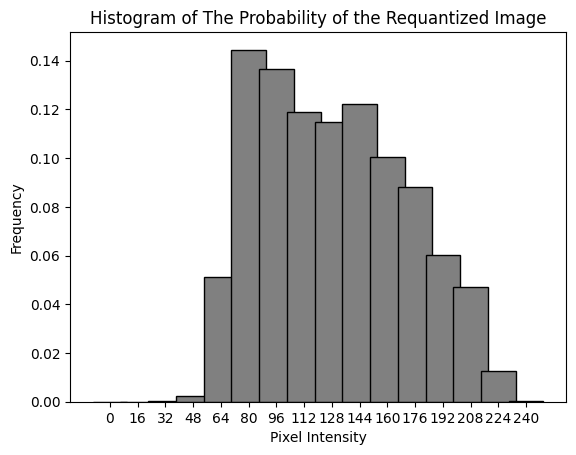

In [39]:
import matplotlib.pyplot as plt

plt.bar(unique_values, counts/(sum(counts)), width=20, color='gray', edgecolor='black')
plt.title("Histogram of The Probability of the Requantized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xticks(unique_values)  # Ensure we see the exact levels
plt.show()